In [1]:
import toolbox_path
import os
from utils import *

from planning_toolbox.imagine import graphs, imagine_state
from planning_toolbox.parser import parse_file

from IPython.display import display

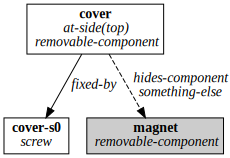

In [2]:
g = graphs.Graph(("cover-s0", "screw"), ("cover", "cover-s0", "fixed-by"),
                 ("cover", "removable-component"), ("magnet", "removable-component"),
                 ("cover", "at-side(top)"),
                 ("cover", "magnet", "hides-component"), ("cover", "magnet", "something-else"))

display(g)

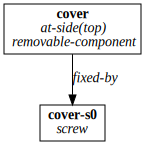

In [3]:
h = graphs.Graph(*g.features(ommit_hidden=True))
display(h)

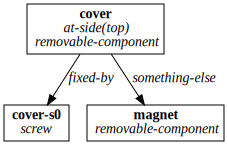

In [4]:
i = g.subgraph("cover", max_depth=1, exclude_links=["hides-component"])
display(i)

In [5]:
folder = "../benchmarks/imagine_simple/"
domain = parse_file(folder+"domain.pddl", "domain")
problems = sorted(folder+f for f in os.listdir(folder) if PROBLEM_FILE_RE.match(f))
print(domain)

(define (domain imagine)

(:requirements :adl :rewards :probabilistic-effects)

(:types screw - removable-component
suction-point lever-point pliers-point - affordance
screwdriver - tool
static-component removable-component - component
tool mode component affordance side affordance-confidence - object)

(:constants top bottom front back left right - side low medium high - affordance-confidence scara power no-mode - mode flat-sd star-sd - screwdriver hammer suction-tool pliers cutter no-tool - tool)

(:predicates
  (has-affordance ?c - removable-component ?a - affordance)
  (has-confidence ?a - affordance ?c - affordance-confidence)
  (broken-component ?c - removable-component)
  (broken-tool ?t - tool)
  (connected ?c1 ?c2 - component)
  (clear ?c - removable-component)
  (current-mode ?m - mode)
  (current-side ?s - side)
  (current-tool ?t - tool)
  (held)
  (fixed-by ?c - removable-component ?s - screw)
  (loose ?c - removable-component)
  (partially-occludes ?c1 ?c2 - component)
  

In [6]:
problem = parse_file(problems[0], "problem", domain)
print(problem)

(define (problem p01)
(:domain imagine)
(:objects lid pcb - removable-component lid-s0 lid-s1 lid-s2 lid-s3 pcb-s0 pcb-s1 pcb-s2 pcb-s3 - screw lid-a0 pcb-a0 - lever-point lid-a1 - suction-point pcb-a1 - pliers-point)
(:init
  (has-affordance lid lid-a0)
  (has-affordance lid lid-a1)
  (has-affordance pcb pcb-a0)
  (has-affordance pcb pcb-a1)
  (has-confidence lid-a0 medium)
  (has-confidence lid-a1 low)
  (has-confidence pcb-a0 low)
  (has-confidence pcb-a1 high)
  (current-mode no-mode)
  (current-tool no-tool)
  (fixed-by lid lid-s0)
  (fixed-by lid lid-s1)
  (fixed-by lid lid-s2)
  (fixed-by lid lid-s3)
  (fixed-by pcb pcb-s0)
  (fixed-by pcb pcb-s1)
  (fixed-by pcb pcb-s2)
  (fixed-by pcb pcb-s3)
  (partially-occludes lid pcb)
  (at-side lid top)
  (at-side pcb bottom)
  (at-side lid-s0 top)
  (at-side lid-s1 top)
  (at-side lid-s2 top)
  (at-side lid-s3 top)
  (at-side pcb-s0 bottom)
  (at-side pcb-s1 bottom)
  (at-side pcb-s2 bottom)
  (at-side pcb-s3 bottom)
  (current-side top

In [7]:
state = imagine_state.ImagineState(problem.init.predicates, objects=problem.objects)

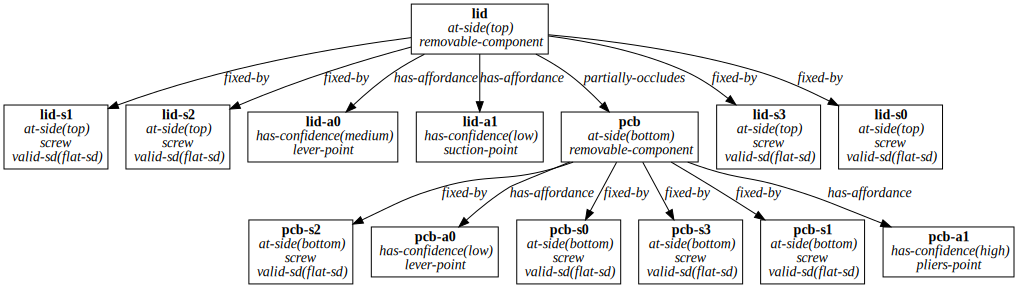

[(current-mode no-mode), (current-tool no-tool), (current-side top), (valid-mode flat-sd scara), (valid-mode flat-sd power), (valid-mode suction-tool scara), (valid-mode suction-tool power), (valid-mode cutter scara), (valid-mode pliers power), (valid-mode hammer power), (opposite-side top bottom), (opposite-side left right), (opposite-side front back), (opposite-side bottom top), (opposite-side right left), (opposite-side back front)]


In [8]:
display(state.graph)
print(state._untransformed_predicates)

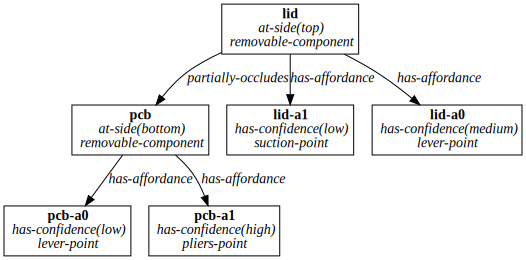

In [12]:
display(state.graph.subgraph("lid-a1", max_depth=3, exclude_links=["fixed-by"]))